# Data Analysis of an IRS 


This is a data analysis of an IRS (Independent Research Study) conducted by Mayurakshi Chatterjee (Liberal Arts student from NMIMS).


## Overview
+ A research study was conducted that was aimed at examining the attitudinal and behavioral responses of the millennial generation when compared to the generation z audience towards a similar piece of advertising.
+ Data was collected by sending a survey to a group of people from age groups of 18-23 and 24-42.



## Advertisement links
+ https://www.youtube.com/watch?v=BxJ1GFIwRWo
+ https://www.youtube.com/watch?v=2utWtHdy1RE
+ https://www.youtube.com/watch?v=pzSG8lMHRQU
+ https://www.youtube.com/watch?v=74Lef0nTRU4
+ https://www.youtube.com/watch?v=xNWWBEXXtLE

## Data Sources
People were asked to fill out this form - https://docs.google.com/forms/d/1PmlfERGTz1TYerxFUpNTEBnUsPa0Q-sEzVHky67pgj0/edit


In [5]:
import geopandas as geo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from shapely.geometry import Point, Polygon
import descartes 

In [6]:
df = pd.read_csv(r"C:\Users\sidp2\OneDrive\Desktop\Data analysis of IRS\IRS.csv")

In [7]:
df.head()

,Age,Your sex,Watch this video\n\n\nWhich ads do you recall among the five ads that were shown to you above?,"Click on this to watch an advertisement.\n\nOn a scale of 1-5, how interesting or boring do you find this ad to be?","On a scale of 1-5, how tempted would you be to buy this product after watching this advertisement?","After seeing this ad, you are likely to do which of the following :","On a scale of 1-5, did the woman in the ad behave like a damsel in distress? \n","On a scale of 1-5, how stereotypical was this ad?\n","On a scale of 1-5, is this ad proof that most people view women of being incapable of financially managing a household alone?","On the scale of 1-5, if the gender roles were reversed, and it was the woman who passed away and the man who was mourning, would the ad still be relevant and not strange for the audience?"
0,Aug-23,Female,"Kotak, Dominos, Policy Bazaar",1,2,Ignore this product,4,4,4,3
1,24-42,Female,"Kotak, Amul, Dominos, Policy Bazaar, KFC",1,2,Ignore this product,3,3,2,3
2,24-42,Female,KFC,1,4,Buy the product,4,1,1,3
3,Aug-23,Female,Amul,1,1,Ignore this product,3,2,4,4
4,24-42,Male,"Kotak, Amul",1,3,Ignore this product,3,4,4,2


In [8]:
df.columns

Index(['Age', 'Your sex',
       'Watch this video\n\n\nWhich ads do you recall among the five ads that were shown to you above? ',
       'Click on this to watch an advertisement.\n\nOn a scale of 1-5, how interesting or boring do you find this ad to be? ',
       'On a scale of 1-5, how tempted would you be to buy this product after watching this advertisement?',
       'After seeing this ad, you are likely to do which of the following :',
       'On a scale of 1-5,  did the woman in the ad behave like a damsel in distress? \n',
       'On a scale of 1-5, how stereotypical was this ad?\n',
       'On a scale of 1-5, is this ad proof that most people view women of being incapable of financially managing a household alone?',
       'On the scale of 1-5, if the gender roles were reversed, and it was the woman who passed away and the man who was mourning, would the ad still be relevant and not strange for the audience?'],
      dtype='object')

In [9]:
# shape of dataset
df.shape


(114, 10)

In [10]:
#data types
df.dtypes


Age                                                                                                                                                                                            object
Your sex                                                                                                                                                                                       object
Watch this video\n\n\nWhich ads do you recall among the five ads that were shown to you above?                                                                                                 object
Click on this to watch an advertisement.\n\nOn a scale of 1-5, how interesting or boring do you find this ad to be?                                                                             int64
On a scale of 1-5, how tempted would you be to buy this product after watching this advertisement?                                                                                              int64
After seei

In [11]:
# first 10
df.head(10)

,Age,Your sex,Watch this video\n\n\nWhich ads do you recall among the five ads that were shown to you above?,"Click on this to watch an advertisement.\n\nOn a scale of 1-5, how interesting or boring do you find this ad to be?","On a scale of 1-5, how tempted would you be to buy this product after watching this advertisement?","After seeing this ad, you are likely to do which of the following :","On a scale of 1-5, did the woman in the ad behave like a damsel in distress? \n","On a scale of 1-5, how stereotypical was this ad?\n","On a scale of 1-5, is this ad proof that most people view women of being incapable of financially managing a household alone?","On the scale of 1-5, if the gender roles were reversed, and it was the woman who passed away and the man who was mourning, would the ad still be relevant and not strange for the audience?"
0,Aug-23,Female,"Kotak, Dominos, Policy Bazaar",1,2,Ignore this product,4,4,4,3
1,24-42,Female,"Kotak, Amul, Dominos, Policy Bazaar, KFC",1,2,Ignore this product,3,3,2,3
2,24-42,Female,KFC,1,4,Buy the product,4,1,1,3
3,Aug-23,Female,Amul,1,1,Ignore this product,3,2,4,4
4,24-42,Male,"Kotak, Amul",1,3,Ignore this product,3,4,4,2
5,Aug-23,Female,Kotak,1,2,Ignore this product,3,5,4,2
6,24-42,Female,"Kotak, Policy Bazaar, KFC",1,3,Find out more about this product,3,4,5,2
7,Aug-23,Female,"Kotak, Amul, Dominos, Policy Bazaar, KFC",1,3,Ignore this product,4,4,4,1
8,24-42,Female,KFC,1,1,Ignore this product,3,4,2,1
9,Aug-23,Male,"Amul, KFC",1,2,Ignore this product,3,2,2,1


Text(0.5, 1.0, 'Correlation Graph of the Dataset')

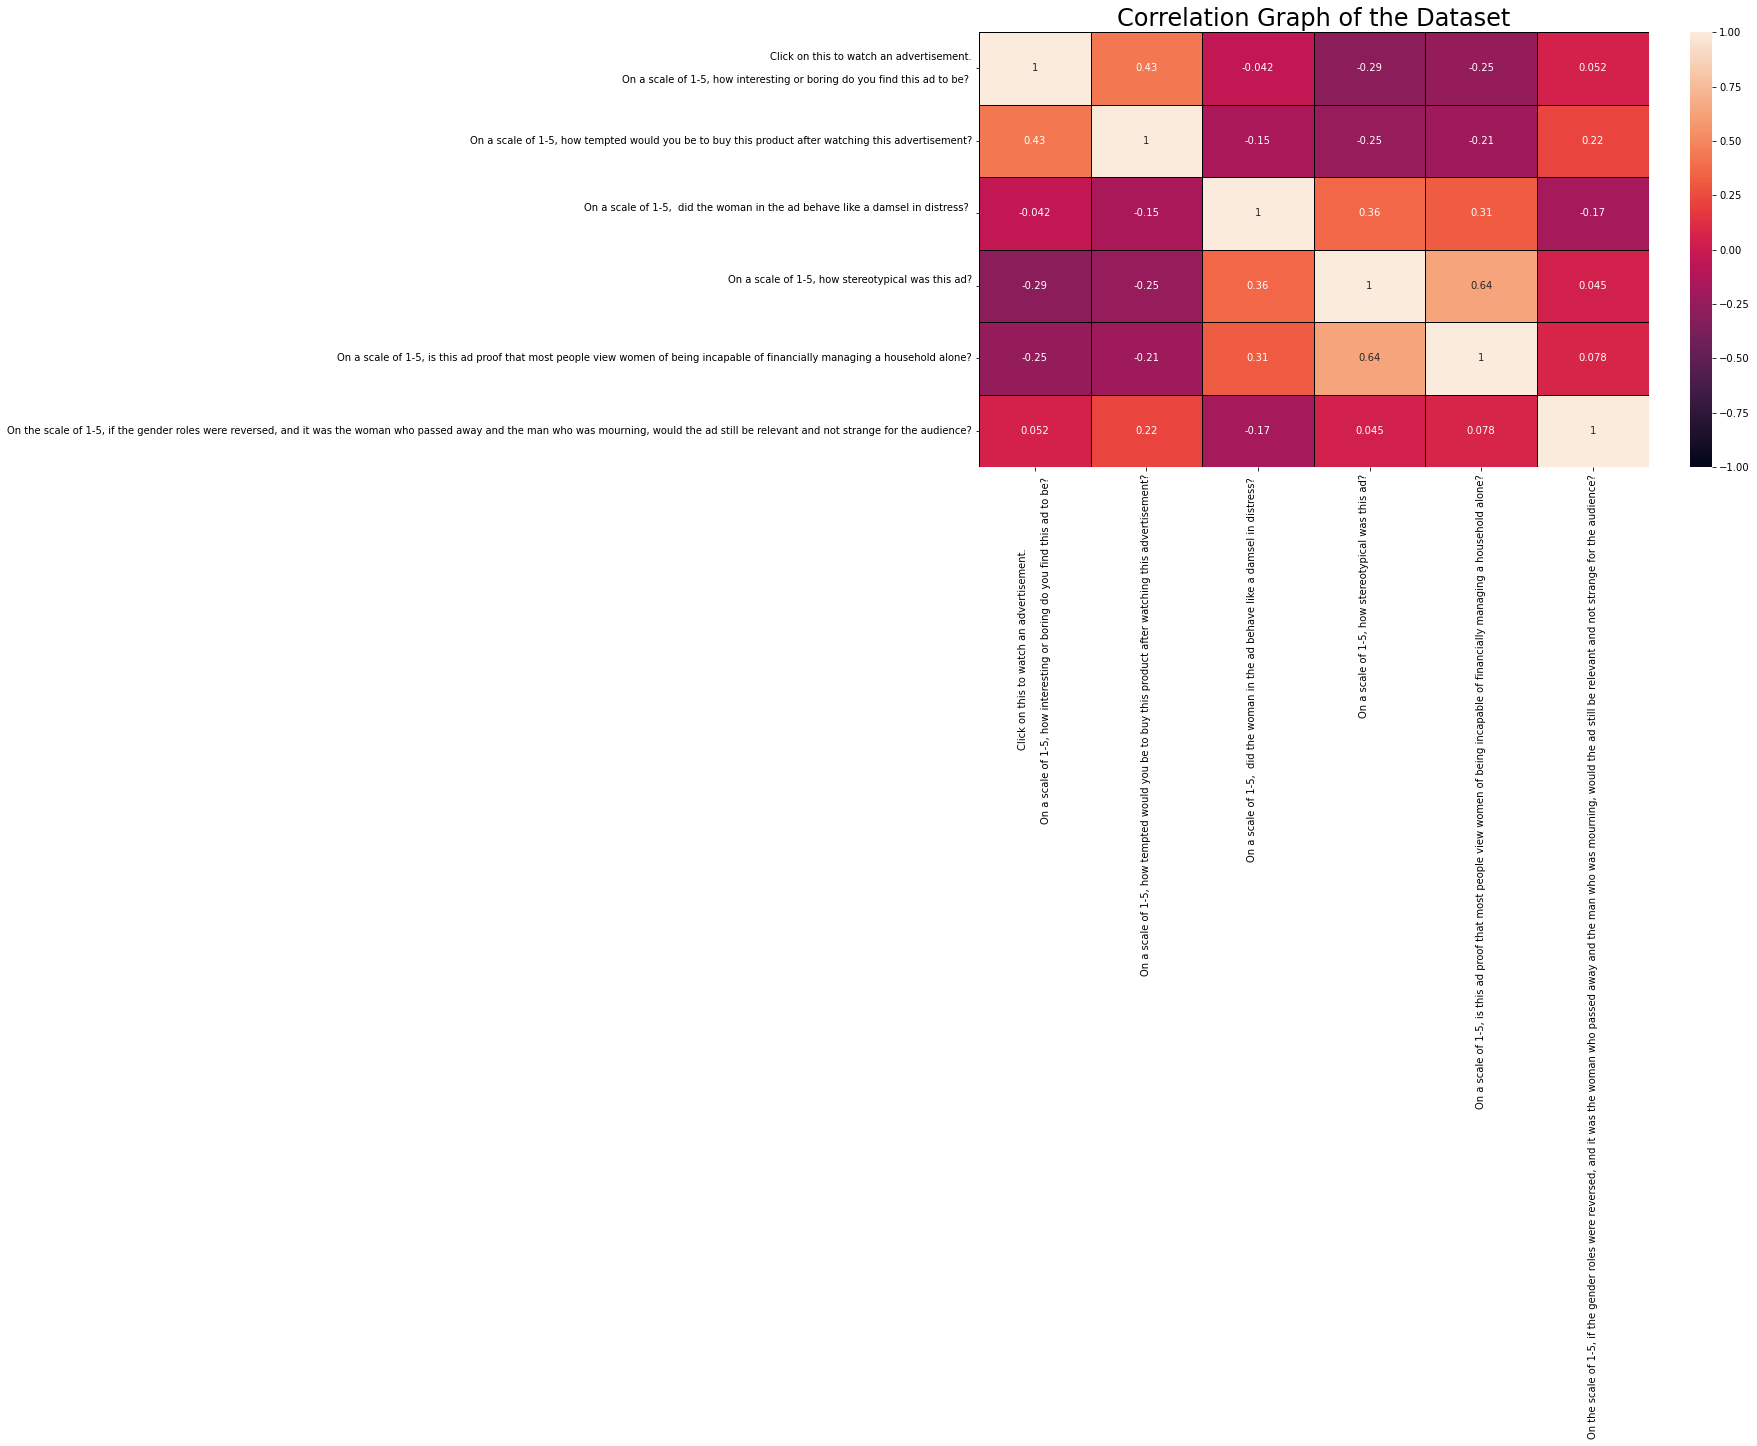

In [12]:
# correlation graph
plt.figure(figsize=(15, 8))
correlation = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, linewidths=1, linecolor='black')
correlation.set_title('Correlation Graph of the Dataset', fontdict={'fontsize': 24})

In [13]:
df.dtypes


Age                                                                                                                                                                                            object
Your sex                                                                                                                                                                                       object
Watch this video\n\n\nWhich ads do you recall among the five ads that were shown to you above?                                                                                                 object
Click on this to watch an advertisement.\n\nOn a scale of 1-5, how interesting or boring do you find this ad to be?                                                                             int64
On a scale of 1-5, how tempted would you be to buy this product after watching this advertisement?                                                                                              int64
After seei

## Piecharts 

<AxesSubplot:ylabel='On a scale of 1-5, how tempted would you be to buy this product after watching this advertisement?'>

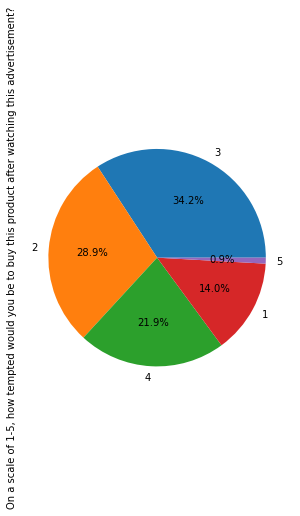

In [19]:
#piechart
plt.figure(figsize=(5,5))
df['On a scale of 1-5, how tempted would you be to buy this product after watching this advertisement?'].value_counts().plot.pie(autopct="%1.1f%%")

<AxesSubplot:ylabel='On a scale of 1-5,  did the woman in the ad behave like a damsel in distress? \n'>

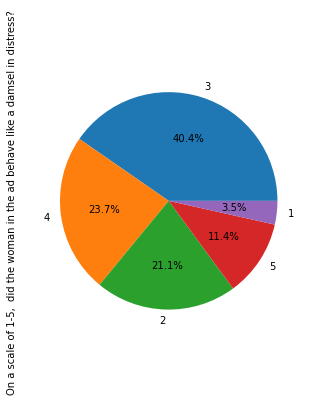

In [20]:
#piechart
plt.figure(figsize=(5,5))
df['On a scale of 1-5,  did the woman in the ad behave like a damsel in distress? \n'].value_counts().plot.pie(autopct="%1.1f%%")

<AxesSubplot:ylabel='On a scale of 1-5, how stereotypical was this ad?\n'>

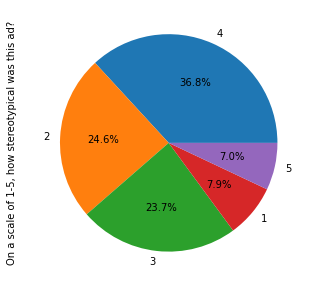

In [21]:
#piechart
plt.figure(figsize=(5,5))
df['On a scale of 1-5, how stereotypical was this ad?\n'].value_counts().plot.pie(autopct="%1.1f%%")

<AxesSubplot:ylabel='On a scale of 1-5, is this ad proof that most people view women of being incapable of financially managing a household alone?'>

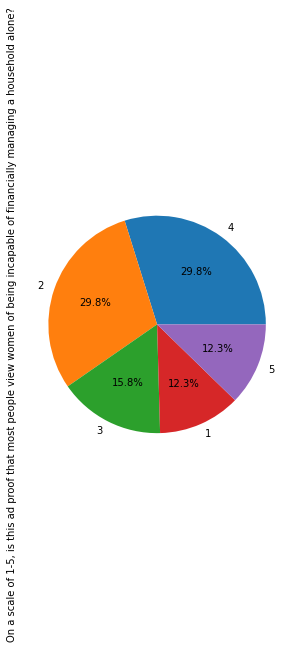

In [22]:
#piechart
plt.figure(figsize=(5,5))
df['On a scale of 1-5, is this ad proof that most people view women of being incapable of financially managing a household alone?'].value_counts().plot.pie(autopct="%1.1f%%")

<AxesSubplot:ylabel='On the scale of 1-5, if the gender roles were reversed, and it was the woman who passed away and the man who was mourning, would the ad still be relevant and not strange for the audience?'>

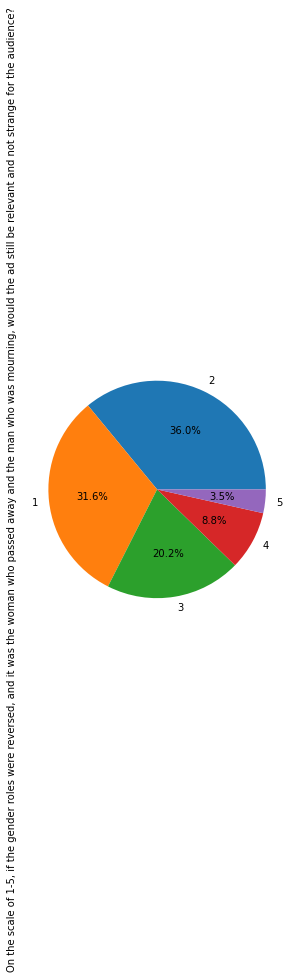

In [23]:
#piechart
plt.figure(figsize=(5,5))
df['On the scale of 1-5, if the gender roles were reversed, and it was the woman who passed away and the man who was mourning, would the ad still be relevant and not strange for the audience?'].value_counts().plot.pie(autopct="%1.1f%%")

## Density Plots

C:\Users\sidp2\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sidp2\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Density Plot')

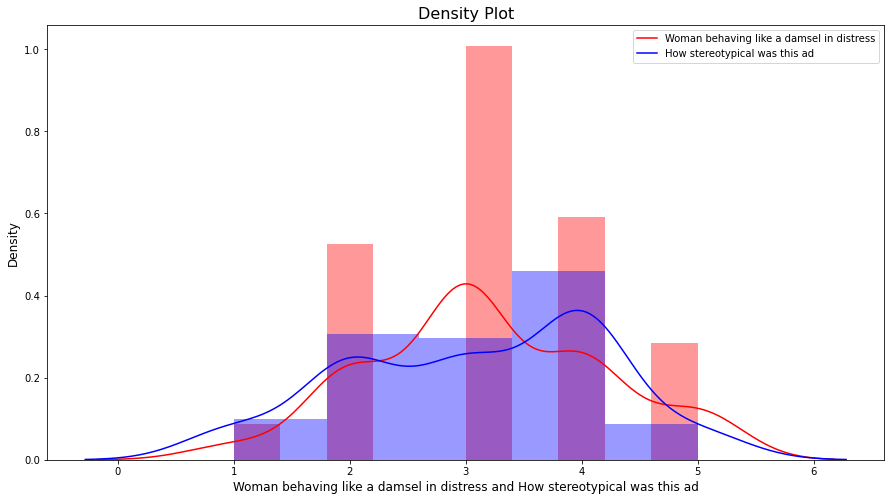

In [24]:
plt.figure(figsize=(15, 8))
sns.distplot(df['On a scale of 1-5,  did the woman in the ad behave like a damsel in distress? \n'], color='red')
sns.distplot(df['On a scale of 1-5, how stereotypical was this ad?\n'], color='blue')
plt.xlabel("Woman behaving like a damsel in distress and How stereotypical was this ad", fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(['Woman behaving like a damsel in distress', 'How stereotypical was this ad'], loc='upper right')
plt.title("Density Plot", fontsize=16)

C:\Users\sidp2\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sidp2\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Density Plot')

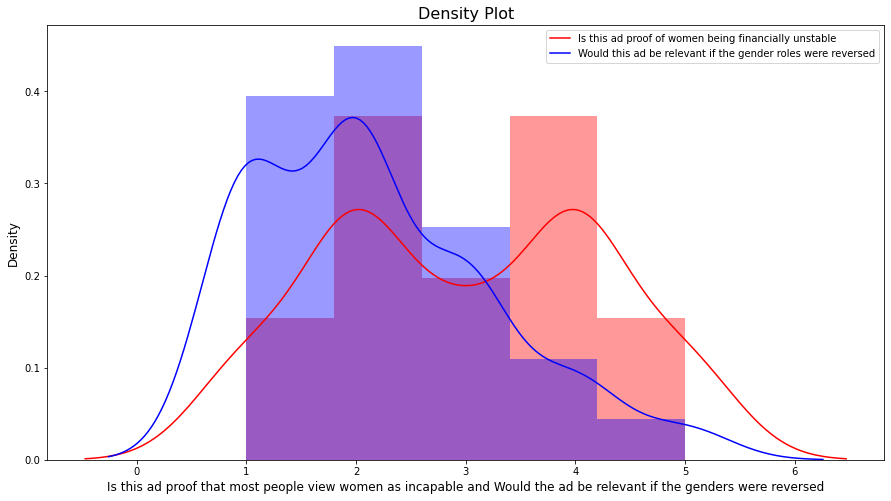

In [25]:
plt.figure(figsize=(15, 8))
sns.distplot(df['On a scale of 1-5, is this ad proof that most people view women of being incapable of financially managing a household alone?'], color='red')
sns.distplot(df['On the scale of 1-5, if the gender roles were reversed, and it was the woman who passed away and the man who was mourning, would the ad still be relevant and not strange for the audience?'], color='blue')
plt.xlabel("Is this ad proof that most people view women as incapable and Would the ad be relevant if the genders were reversed", fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(['Is this ad proof of women being financially unstable', 'Would this ad be relevant if the gender roles were reversed'], loc='upper right')
plt.title("Density Plot", fontsize=16)

In [29]:
df.dtypes

Age                                                                                                                                                                                            object
Your sex                                                                                                                                                                                       object
Watch this video\n\n\nWhich ads do you recall among the five ads that were shown to you above?                                                                                                 object
Click on this to watch an advertisement.\n\nOn a scale of 1-5, how interesting or boring do you find this ad to be?                                                                             int64
On a scale of 1-5, how tempted would you be to buy this product after watching this advertisement?                                                                                              int64
After seei

In [27]:
df['On a scale of 1-5, how tempted would you be to buy this product after watching this advertisement?'].value_counts()

3    39
2    33
4    25
1    16
5     1
Name: On a scale of 1-5, how tempted would you be to buy this product after watching this advertisement?, dtype: int64

In [30]:
df['On a scale of 1-5,  did the woman in the ad behave like a damsel in distress? \n'].value_counts()

3    46
4    27
2    24
5    13
1     4
Name: On a scale of 1-5,  did the woman in the ad behave like a damsel in distress? \n, dtype: int64

In [31]:
df['On a scale of 1-5, how stereotypical was this ad?\n'].value_counts()

4    42
2    28
3    27
1     9
5     8
Name: On a scale of 1-5, how stereotypical was this ad?\n, dtype: int64

In [32]:
df['On a scale of 1-5, is this ad proof that most people view women of being incapable of financially managing a household alone?'].value_counts()

4    34
2    34
3    18
1    14
5    14
Name: On a scale of 1-5, is this ad proof that most people view women of being incapable of financially managing a household alone?, dtype: int64

In [33]:
df['On the scale of 1-5, if the gender roles were reversed, and it was the woman who passed away and the man who was mourning, would the ad still be relevant and not strange for the audience?'].value_counts()

2    41
1    36
3    23
4    10
5     4
Name: On the scale of 1-5, if the gender roles were reversed, and it was the woman who passed away and the man who was mourning, would the ad still be relevant and not strange for the audience?, dtype: int64

<AxesSubplot:>

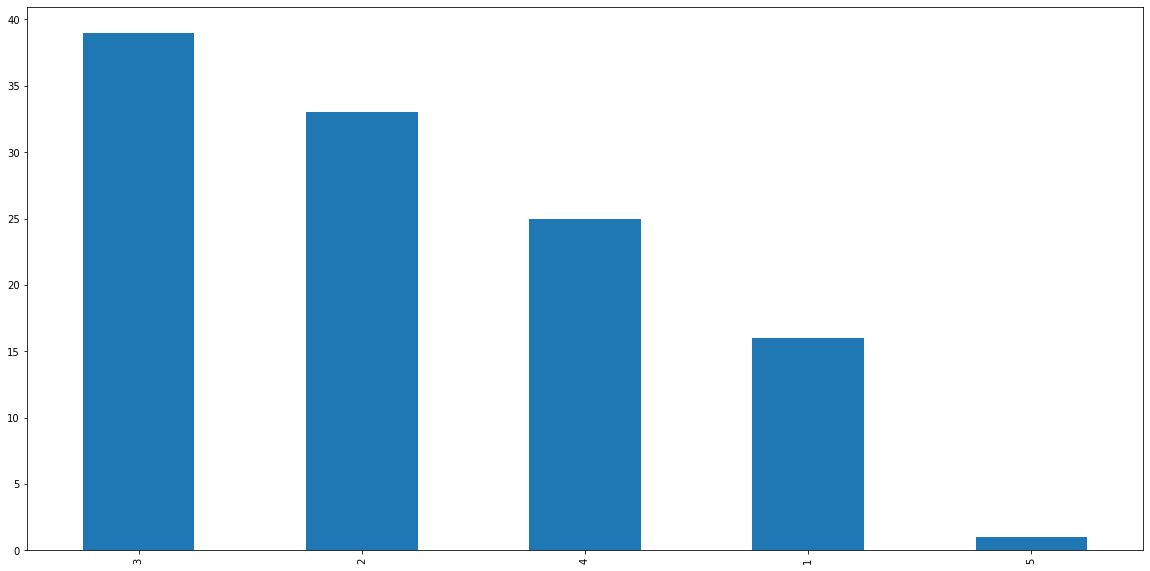

In [34]:
df['On a scale of 1-5, how tempted would you be to buy this product after watching this advertisement?'].value_counts().plot(kind='bar', figsize=(20,10))

<AxesSubplot:>

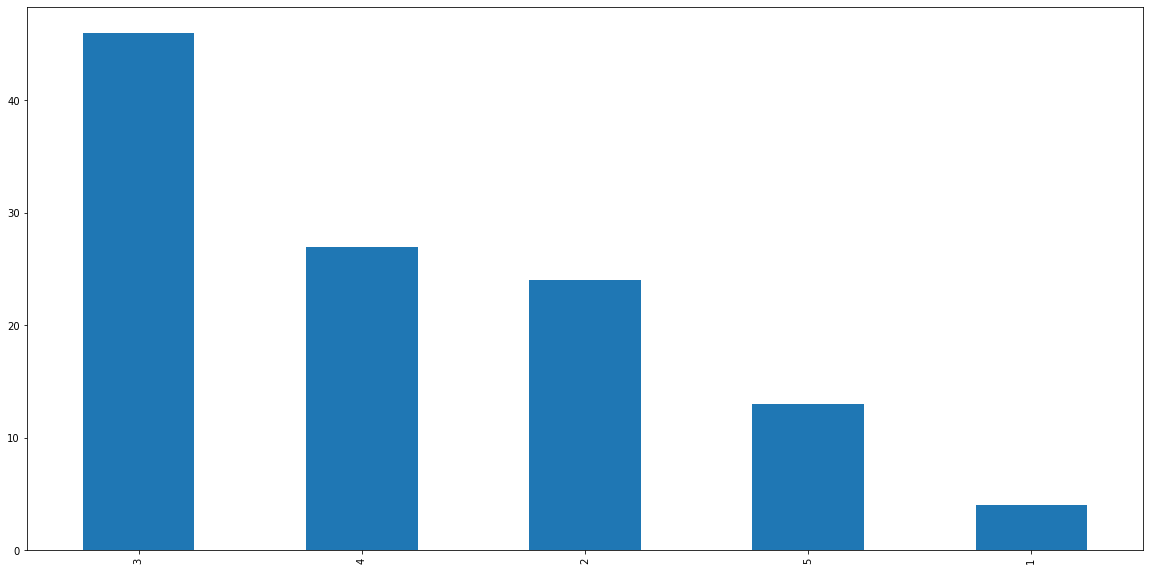

In [36]:
df['On a scale of 1-5,  did the woman in the ad behave like a damsel in distress? \n'].value_counts().plot(kind='bar', figsize=(20,10))

<AxesSubplot:>

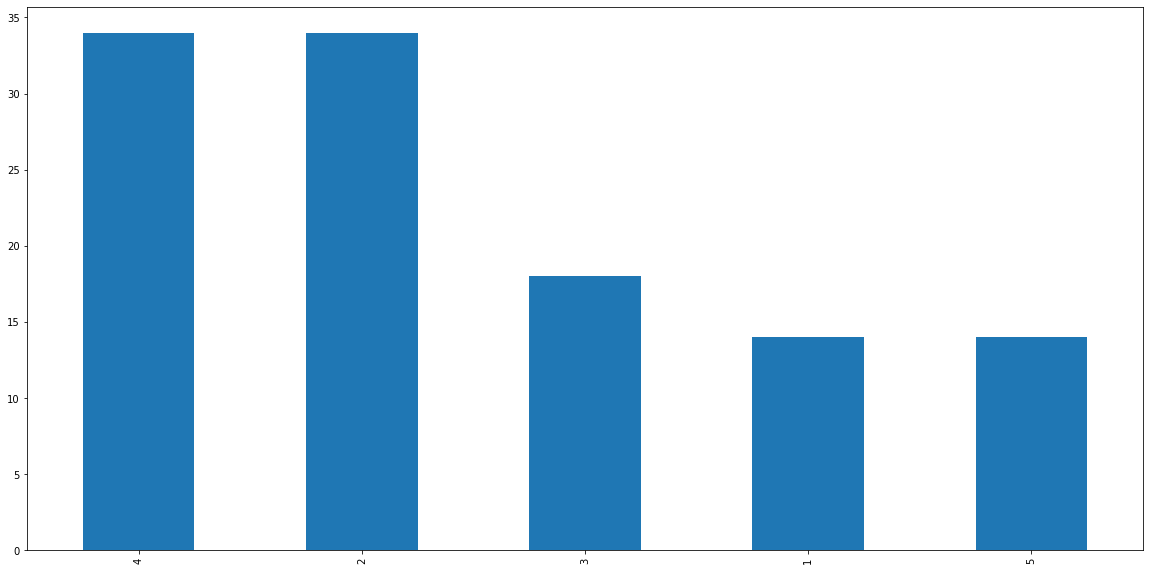

In [37]:
df['On a scale of 1-5, is this ad proof that most people view women of being incapable of financially managing a household alone?'].value_counts().plot(kind='bar', figsize=(20,10))

<AxesSubplot:>

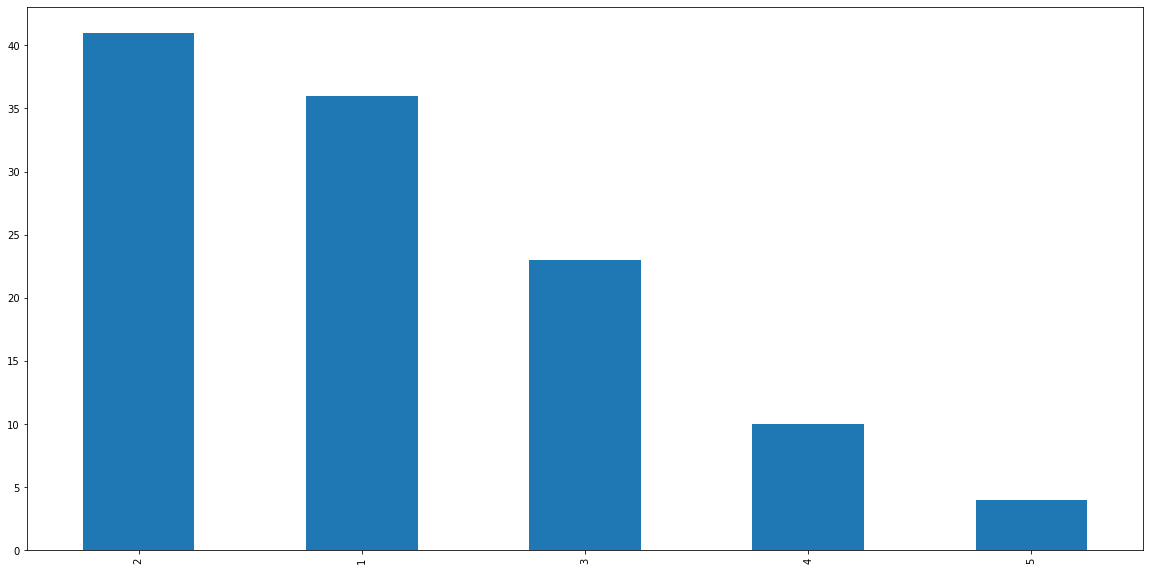

In [38]:
df['On the scale of 1-5, if the gender roles were reversed, and it was the woman who passed away and the man who was mourning, would the ad still be relevant and not strange for the audience?'].value_counts().plot(kind='bar', figsize=(20,10))

In [40]:
df['On a scale of 1-5, how tempted would you be to buy this product after watching this advertisement?'].unique()

array([2, 4, 1, 3, 5], dtype=int64)

## Conclusion
+ Millennials were a bit more regressive  than gen z.
+ Impact of advertising on purchasing behavior.
+ Opportunities for cross-generational advertising

## Future Studies
The results of this study has great usefulness for industry practitioners as they try to talk to both these audiences.
+ Longitudinal studies
+ Cross-cultural studies
+ Neuromarketing studies
+ Comparative studies

## Contributions
+ Identifying key differences in attitudes towards advertising between Millennials and Gen Z : helpful for marketers and advertisers to tailor their campaigns to better target each demographic.
+ Providing insights into how generational identity affects attitudes toward advertising.
+ Highlighting the importance of considering demographic factors such as age when conducting market research.

## Limitations
+ The sampling method -  predominantly upper middle class individuals residing in urban metro cities.
+ Failed to consider the responses of minority communities whose preferences and privileges may vary greatly from those of other groups.
+ Restricted and similar responses
